<h1>Machine Learning</h1> 

<h1>Description of the data used.</h1>

# Bank Marketing Dataset

## Introduction

The dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The primary classification goal is to predict whether a client will subscribe to a term deposit ("yes" or "no").

## Input Variables

### Bank Client Data

1. Age (numeric)
2. Job: Type of job (categorical)
   - 'admin.'
   - 'blue-collar'
   - 'entrepreneur'
   - 'housemaid'
   - 'management'
   - 'retired'
   - 'self-employed'
   - 'services'
   - 'student'
   - 'technician'
   - 'unemployed'
   - 'unknown'
3. Marital: Marital status (categorical)
   - 'divorced'
   - 'married'
   - 'single'
   - 'unknown' (Note: 'divorced' means divorced or widowed)
4. Education: Education level (categorical)
   - 'basic.4y'
   - 'basic.6y'
   - 'basic.9y'
   - 'high.school'
   - 'illiterate'
   - 'professional.course'
   - 'university.degree'
   - 'unknown'
5. Default: Has credit in default? (categorical)
   - 'no'
   - 'yes'
   - 'unknown'
6. Housing: Has housing loan? (categorical)
   - 'no'
   - 'yes'
   - 'unknown'
7. Loan: Has personal loan? (categorical)
   - 'no'
   - 'yes'
   - 'unknown'

### Related to the Last Contact of the Current Campaign

8. Contact: Contact communication type (categorical)
   - 'cellular'
   - 'telephone'
9. Month: Last contact month of year (categorical)
   - 'jan'
   - 'feb'
   - 'mar'
   - ...
   - 'nov'
   - 'dec'
10. Day of Week: Last contact day of the week (categorical)
    - 'mon'
    - 'tue'
    - 'wed'
    - 'thu'
    - 'fri'
11. Duration: Last contact duration, in seconds (numeric)

### Other Attributes

12. Campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. Pdays: Number of days that passed after the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted)
14. Previous: Number of contacts performed before this campaign and for this client (numeric)
15. Poutcome: Outcome of the previous marketing campaign (categorical)
    - 'failure'
    - 'nonexistent'
    - 'success'

### Social and Economic Context Attributes

16. Emp. Variation Rate: Employment variation rate - quarterly indicator (numeric)
17. Cons. Price Index: Consumer price index - monthly indicator (numeric)
18. Cons. Confidence Index: Consumer confidence index - monthly indicator (numeric)
19. Euribor 3-Month Rate: Euribor 3-month rate - daily indicator (numeric)
20. Nr. Employed: Number of employees - quarterly indicator (numeric)

## Output Variable

21. y: Has the client subscribed a term deposit? (binary)
   - 'yes'
   - 'no'


In [1]:
import numpy as np #Import the numpy library and alias it as 'np' this library provides support for arrays, matrices, and mathematical functions
import pandas as pd #Import the pandas library and alias it as 'pd' this library provides data manipulation and analysis tools
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("bank-additional-full.csv")# Read the CSV file "bank-additional-full.csv" and store it as a DataFrame
df# Display the DataFrame

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


<h1>Data Pre-Processing</h1>

In [3]:
columns=df.columns[0].split(";")

In [4]:
def dataPreprocessor(df):
    rows = []
    columns = []
    columns = df.columns[0].split(";")
    for index in df.iterrows():
        rows.append(index[1][0].split(";"))
    return pd.DataFrame(rows, columns=columns)
df = dataPreprocessor(df)
df

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [5]:
df.columns

Index(['age', '"job"', '"marital"', '"education"', '"default"', '"housing"',
       '"loan"', '"contact"', '"month"', '"day_of_week"', '"duration"',
       '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"emp.var.rate"',
       '"cons.price.idx"', '"cons.conf.idx"', '"euribor3m"', '"nr.employed"',
       '"y"'],
      dtype='object')

In [6]:
df.columns=df.columns.str.replace('"','')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [7]:
for i in df.columns:
    df[i]=df[i].str.replace('"','')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
df.dtypes

age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [10]:
df = df[['duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'age', 'y']]
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
df['y'] = df['y'].map({'yes': 1,'no': 0})
df

C:\Users\kille\AppData\Local\Temp\ipykernel_13328\3150164658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'yes': 1,'no': 0})


,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,y
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191,56,0
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191,57,0
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191,37,0
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191,40,0
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191,56,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,73,1
41184,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,46,0
41185,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,56,0
41186,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,44,1


In [12]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [13]:
df

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,y
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191,56,0
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191,57,0
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191,37,0
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191,40,0
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191,56,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,73,1
41184,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,46,0
41185,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,56,0
41186,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,44,1


In [15]:
df[['duration', 'campaign', 'pdays','previous','emp.var.rate', 'cons.price.idx',
     'cons.conf.idx', 'euribor3m', 'nr.employed', 'age']] = df[['duration', 'campaign', 'pdays','previous','emp.var.rate', 'cons.price.idx',
     'cons.conf.idx', 'euribor3m', 'nr.employed', 'age']].apply(pd.to_numeric)

C:\Users\kille\AppData\Local\Temp\ipykernel_13328\1818726513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['duration', 'campaign', 'pdays','previous','emp.var.rate', 'cons.price.idx',


In [16]:
df

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,y
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,56,0
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,57,0
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,37,0
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,40,0
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,56,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,73,1
41184,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,46,0
41185,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,56,0
41186,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,44,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
 9   age             41188 non-null  int64  
 10  y               41188 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 3.5 MB


In [18]:
df.corr()


,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,y
duration,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.000866,0.405274
campaign,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.004594,-0.066357
pdays,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.034369,-0.324914
previous,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.024365,0.230181
emp.var.rate,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.000371,-0.298334
cons.price.idx,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,0.000857,-0.136211
cons.conf.idx,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.129372,0.054878
euribor3m,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.010767,-0.307771
nr.employed,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.017725,-0.354678
age,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,1.000000,0.030399


In [19]:
X = df.drop(columns = ['y'],axis = 1)
Y = df['y']

In [20]:
X

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,56
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,57
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,37
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,40
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,56
...,...,...,...,...,...,...,...,...,...,...
41183,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,73
41184,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,46
41185,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,56
41186,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,44


In [21]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

<h1>Distance Measure</h1>

In [22]:
from math import sqrt

def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1) - 1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Example DataFrame
data = {
    "duration": [43, 398, 568, 133,264],
    "campaign": [3,3,1,2,1],
    "y": [0,0,1,0,0]
}

data = pd.DataFrame(data)

# Example row for which you want to calculate distances
example_row = df.iloc[0]

for index,row in df.iterrows():
    distance = euclidean_distance(example_row.values, row.values)
print(distance)


229.67633480617857


In [23]:

def custom_train_test_split(X, Y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)
    
    shuffled_indices = np.random.permutation(num_samples)
    train_indices, test_indices = shuffled_indices[num_test_samples:], shuffled_indices[:num_test_samples]
    
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = custom_train_test_split(X, Y, test_size=0.2, random_state=0)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\nY_train:")
print(Y_train)
print("\nY_test:")
print(Y_test)


X_train:
       duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
37567       105         1    999         0          -2.9          92.201   
29321       501         3    999         0          -1.8          93.075   
23925        59         2    999         0           1.4          93.444   
39148       292         2    999         1          -1.8          93.369   
12078        76         1    999         0           1.4          94.465   
...         ...       ...    ...       ...           ...             ...   
20757       559         2    999         0           1.4          93.444   
32103       166         1    999         0          -1.8          92.893   
30403       427         3    999         0          -1.8          93.075   
21243       111         1    999         0           1.4          93.444   
2732        132         1    999         0           1.1          93.994   

       cons.conf.idx  euribor3m  nr.employed  age  
37567          -31.4      

<h1>Analyse the performance of the algorithm in terms of accuracy for the given data using Euclidian Distance</h1>

<h1>Euclidian Distance</h1>

In [24]:
class KNN_Algorithm_ED:
    def fit(self, X, y):
        self.X_train = X
        self.Y_train = y
    
    def predict(self, X, k=3):
        y_pred = []
        for x in X:
            distances = np.sqrt(np.sum((x - self.X_train)**2, axis=1))  # Calculate Euclidean distances between x and all training data points
            k_indices = np.argsort(distances)[:k]  # Get indices of k nearest neighbors based on distances
            k_nearest_labels = self.Y_train[k_indices]  # Get labels of k nearest neighbors
            y_pred.append(np.bincount(k_nearest_labels).argmax())  # Predict the label based on the most common label among neighbors
        return np.array(y_pred)  # Return the predicted labels as an array

neighbours = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]

for k in neighbours:
    knn = KNN_Algorithm_ED()  # Create a KNN model instance
    knn.fit(X_train.values, Y_train.values)  # Train the model with training data and labels
    predictions = knn.predict(X_test.values, k=k)  # Make predictions on test data using 'k' nearest neighbors
    accuracy = np.mean(predictions == Y_test.values) * 100  # Calculate accuracy by comparing predicted labels with actual test labels
    print(f"For k={k}, Accuracy: {accuracy:.2f}%")  # Print accuracy for the current value of 'k'


For k=1, Accuracy: 89.22%
For k=3, Accuracy: 90.51%
For k=5, Accuracy: 90.99%
For k=7, Accuracy: 91.23%
For k=9, Accuracy: 91.20%
For k=11, Accuracy: 91.33%
For k=13, Accuracy: 91.39%
For k=15, Accuracy: 91.54%
For k=17, Accuracy: 91.49%
For k=19, Accuracy: 91.54%
For k=21, Accuracy: 91.71%
For k=23, Accuracy: 91.78%
For k=25, Accuracy: 91.72%
For k=27, Accuracy: 91.57%
For k=29, Accuracy: 91.64%
For k=31, Accuracy: 91.66%
For k=33, Accuracy: 91.62%
For k=35, Accuracy: 91.64%
For k=37, Accuracy: 91.81%
For k=39, Accuracy: 91.70%
For k=41, Accuracy: 91.72%
For k=43, Accuracy: 91.70%
For k=45, Accuracy: 91.60%
For k=47, Accuracy: 91.61%
For k=49, Accuracy: 91.57%
For k=51, Accuracy: 91.53%


## Explore atleast one of the techniques to fix the value of K in the algorithm

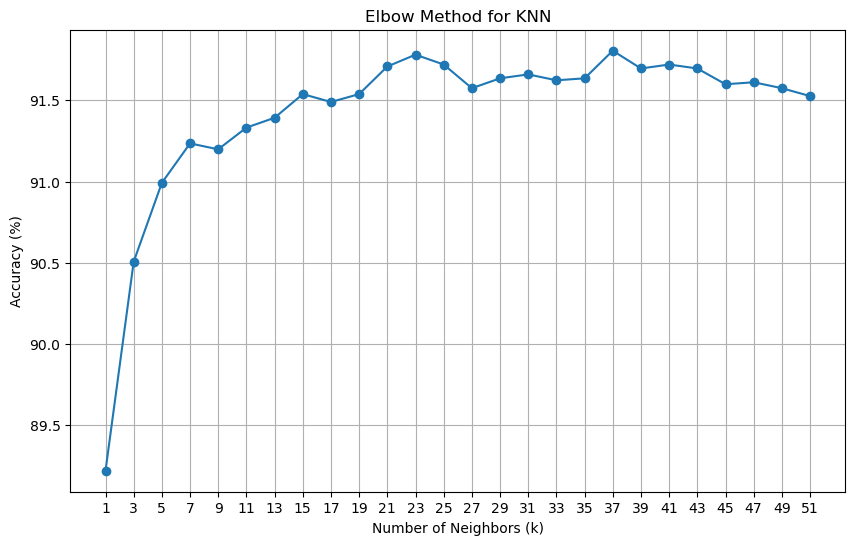

In [26]:
neighbours = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]
accuracies = []
for k in neighbours:
    knn = KNN_Algorithm_ED()  # Create a KNN model instance
    knn.fit(X_train.values, Y_train.values)  # Train the model with training data and labels
    predictions = knn.predict(X_test.values, k=k)  # Make predictions on test data using 'k' nearest neighbors
    accuracy = np.mean(predictions == Y_test.values.astype(int)) * 100  # Convert Y_test to int64 and calculate accuracy
    accuracies.append(accuracy)
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(neighbours, accuracies, marker='o')
plt.title('Elbow Method for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.xticks(neighbours)
plt.show()